In [1]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
dataset = keras.datasets.mnist

In [3]:
(X_train,y_train),(X_test,y_test)=dataset.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

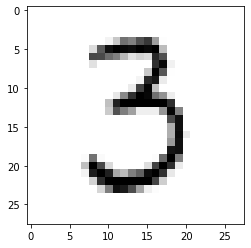

In [7]:
X_train[50] #gray scale --> 0 to 255
plt.imshow(X_train[50],cmap='binary')
plt.show()

In [8]:
y_train[50]

3

In [9]:
#Preprocessing 
X_train = X_train.reshape(60000,28*28) #flatten
#Scaling : (0 to 255) to (0 to 1)
X_train = X_train.astype('float32')/255

In [10]:
#Preprocessing 
X_test = X_test.reshape(10000,28*28) #flatten
#Scaling : (0 to 255) to (0 to 1)
X_test = X_test.astype('float32')/255

In [11]:
X_train.shape

(60000, 784)

In [12]:
#Sequential API
dnn = keras.models.Sequential() #obj_name = Class_name

In [13]:
dnn.add(keras.layers.Dense(50,activation='relu',input_shape = X_train.shape[1:] ))

In [14]:
dnn.add(keras.layers.Dense(30,activation='relu'))

In [15]:
dnn.add(keras.layers.Dense(10,activation='softmax')) #softmax --> outputs probabilities , 0.8 for class, 

In [16]:
dnn.summary() #784 + 1(bias) * 50 =785*50

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


In [17]:
dnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
#Training
history_dnn = dnn.fit(x=X_train,y=y_train, validation_split=0.1, epochs=10,batch_size=16)

Epoch 1/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.2907 - accuracy: 0.9139 - val_loss: 0.1309 - val_accuracy: 0.9620
Epoch 2/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.1423 - accuracy: 0.9573 - val_loss: 0.1137 - val_accuracy: 0.9650
Epoch 3/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.1083 - accuracy: 0.9668 - val_loss: 0.0962 - val_accuracy: 0.9698
Epoch 4/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.0892 - accuracy: 0.9720 - val_loss: 0.0991 - val_accuracy: 0.9715
Epoch 5/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.0754 - accuracy: 0.9760 - val_loss: 0.1016 - val_accuracy: 0.9712
Epoch 6/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.0643 - accuracy: 0.9791 - val_loss: 0.1051 - val_accuracy: 0.9690
Epoch 7/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.0567 - accuracy: 0.9821 - val_loss: 0.0942 - val_accuracy:

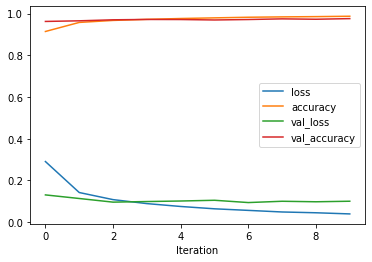

In [19]:
pd.DataFrame(history_dnn.history).plot()
plt.xlabel("Iteration")
plt.show()

In [20]:
#Testing
test_loss, test_accuracy =   dnn.evaluate(x=X_test,y=y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.9730


In [21]:
y_test[13]

0

In [22]:
dnn.predict(X_test[13].reshape(1,784))

array([[9.9968636e-01, 1.3978288e-07, 1.8586761e-04, 1.7397214e-08,
        1.2882631e-06, 1.9372160e-06, 7.6078340e-06, 1.0783157e-04,
        4.3869145e-06, 4.5024317e-06]], dtype=float32)

In [23]:
np.argmax( dnn.predict(X_test[13].reshape(1,784)) )

0